In [11]:
import numpy as np

import matplotlib.pyplot as plt


In [2]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [3]:
##normalizing the eqauation
##using inv to calculate the inverse form the np.linalg and using dot to multipy
X_b=np.c_[np.ones((100,1)),X]# add x0= 1 to each instance
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
#using y=4+3x+gaussian noise 
# lets see what the equation found 

theta_best

array([[3.94695972],
       [3.20980292]])

In [5]:
#now we make predictions using theta

X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]

y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.94695972],
       [10.36656556]])

In [6]:
#plotting the model predictions 

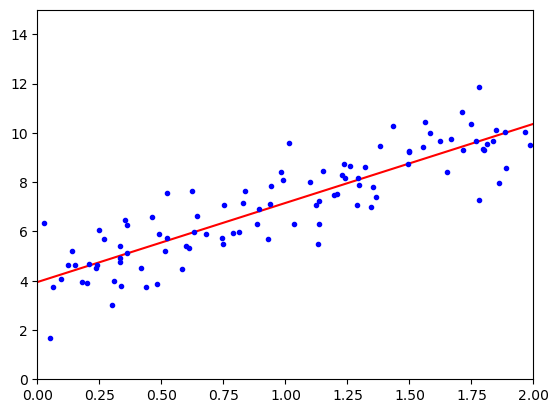

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing  linear regression using scikit learn is simple

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([3.94695972]), array([[3.20980292]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.94695972],
       [10.36656556]])